In [26]:
import numpy as np
N = 720
habit = np.zeros(N)
energy= np.zeros(N)

#1. Tham so cho E
E_timeLowerBound = 300
E_timeUpperBound = 1260
#1. Tinh E
for i in range(0,N):
    t = 2* i
    if E_timeLowerBound< t and t < E_timeUpperBound:
        energy[i] = 1
        #2. Tham so cho thoi quen an H
t_lowerMeal = ['0', 260,580,600,600]
t_upperMeal = ['0',1000,1400,1400,1440]
t_meanMeal = ['0',500,750,610,1140]
t_sigmaMeal = ['0',85,20,240,87]
w_peak =['0',0.92,0.45,0.65,0.65]
w_snack= 0.047
import matplotlib.pyplot as plt
import math
def indicate_function(val,dau, cuoi):
    if(dau <=val and val <=cuoi):
        return 1
    else:
        return 0

thoi_gian = np.linspace(0,24, 1000)
def Habit(tgian):
    res = w_snack
    for i in range(1,5):
        res +=indicate_function(tgian,t_lowerMeal[i],t_upperMeal[i])*w_peak[i] *math.exp(-1/2*((tgian-t_meanMeal[i])/t_sigmaMeal[i])**2)
    return res
#2. Tinh ham habit
for i in range(0, N):
    habit[i] = Habit(2*i)

In [27]:
#3,4,5,6,7,8,9: Cac tham so con lai can init va vong lap
#Init
eta_G = 0.1
t_12 = 90


def food_calculation():
    ghrelin = np.zeros(N)
    glucose = np.zeros(N)
    appetite = np.zeros(N)
    k_an_nhin = np.zeros(N)
    k_nhin_an = np.zeros(N) 
    indicator_intake = np.zeros(N) 
    stomach = np.zeros(N)
    quality_food = np.zeros(N)
    ghrelin[0] = 178
    glucose[0] = 5
    stomach[0] = 0

    p_ij_HA = 0.01
    w_A = 0.1
    A_max =300
    k_nhin_an[0] = p_ij_HA * ghrelin[0] * (1 + w_A*appetite[0]/A_max)
    k_an_nhin[0] = 0.001
    indicator_intake[0] = 0

    for i in range(1,N):
        #3. Ghrelin
        lambda_LS = 0.00462098
        k_XL = 0.02
        L_max = 208
        k_LS_max  = k_XL *L_max
        bthuc = k_LS_max * np.exp(-lambda_LS*stomach[i-1]) - k_XL*ghrelin[i-1]
        ghrelin[i] = ghrelin[i-1] + 2* bthuc


        #4. Glucose
        k_XG = 0.0072
        k_XGE = 0.0036
        k_G = 0.4464
        k_XS = np.log(2)/t_12
        ro_GS = 0.9
        vG = 12.4
        bthuc = -(k_XG + k_XGE*energy[i-1])*glucose[i-1] + (k_G+k_XS*eta_G*ro_GS*stomach[i-1])/vG 
        glucose[i] = glucose[i-1] + 2* bthuc


        #5. Appetite
        l_A50 = 120
        lambda_AG = 0.3
        bthuc = A_max * ghrelin[i]/(ghrelin[i] + l_A50) * np.exp(-lambda_AG*glucose[i])
        appetite[i] = bthuc

        #6.k_ji
        k_nhin_an[i] = p_ij_HA * habit[i] * (1 + w_A*appetite[i]/A_max)

        #9. stomach
        k_XS =0.0154033
        k_S =16.5
        bthuc = -k_XS*stomach[i-1] + k_S* indicator_intake[i-1]
        stomach[i] = stomach[i-1] + 2*bthuc
        #7.k_ij
        k_ij0 = 0.001
        ps_ij = 0.0001
        pG_ij = 0.0001
        k_an_nhin[i] = k_ij0 + ps_ij*stomach[i] + pG_ij*glucose[i]
        #8 indicator intake
        import random
        u = random.uniform(0,1)
        if(indicator_intake[i-1]==0):
            if(u<=1-np.exp(-k_nhin_an[i-1] * 2)):
                indicator_intake[i] = 1
        else:
            if(u > 1-np.exp(-k_an_nhin[i-1] * 2)):
                indicator_intake[i] = 1
        if(i == 1):
            indicator_intake[i] = 0
        #9. Quality of food
        quality_food[i] = indicator_intake[i] * k_S * 2
    return quality_food


<BarContainer object of 24 artists>

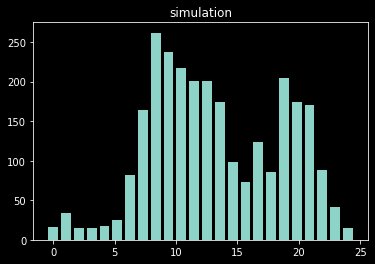

In [28]:
trials = 100
sum = np.zeros(N)
for i in range(0,trials):
    sum += food_calculation()
sum/=trials
box = np.zeros(24)
for i in range(N):
    j = i/30
    box[int(j)] += sum[i]
plt.title('simulation')
plt.bar(np.linspace(0,24,24),box)

In [29]:
total = 0
for i in range(0,N):
    total +=sum[i]
total

2734.3799999999983

In [30]:
cabon = total *eta_G
cabon

273.4379999999998